# Table of Contents  

1. Project proposal 
2. Introduction to the dataset
3. Data Exploration and cleaning
4. Exploration and Questions
5. Machine Learning
6. Conclusion 
7. Reference

# Summary

For the evaluation of the key indicators for heart disease, we initially start off the notebook with data exploration and cleaning, after which we dive deep into visualizations where we explore the disparities in heart disease with regards to Race. Different variables are explored with relation to Race, such as Sex, Stroke, Difficulty Walking etc. 

Our visualizations play around with these key variables where we have explored different aspects keeping in mind our target variable: HeartDisease. Insights have been explored and shown below.









# 1.Project proposal
###Evaluating Key Indicators of Heart Disease

**The goal** of the project is to test different factors in order to detect the ones that have the greatest impact on heart disease, which will ultimately serve in helping us find ways to prevent them. We also want to identify which demographics (race and gender) are more at risk, as well as which lifestyle factors are most relevant to the prevalence of heart disease. All of these will help in providing relevant and timely support to the groups most at risk.  

**We are interested in this problem because** heart disease is one the leading causes of death, leading to ~ 930,000 deaths/year in the US alone, and $229 billion in healthcare costs/year according to CDC. Identifying the factors that play a role in causing heart diseases will help reduce these losses.


** Data Source**: The dataset comes from the CDC and is a major part of the Behavioral Risk Factor Surveillance System. https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease   
The original dataset of nearly 300 variables was reduced to just about 20 variables by Kamil Pytlak on Kaggle. We will try using the original file from the CDC for the purposes of our analysis, linked here (the file is in ASCII format, and we will discuss with sir on how best to access it): https://www.cdc.gov/brfss/annual_data/2020/files/LLCP2020ASC.zip

# 2.Introduction to the Dataset

- The dataset comes from the CDC and is a major part of the Behavioral Risk  Factor Surveillance System. 
- The dataset has 319,795 rows and 18 columns. Each row represents respondents to the survey. 
- Target value is `HeartDisease`, indicating whether the respondent ever reported having heart disease.
- Each Column is an indicator that might have a relationship with heart disease. See the table below for the detail of the columns. 
- We don't have missing value in our dataset (explored further below)


| Column title| Data Type   |Description|
| :----------- | :----------- | :--------|
| `HeartDisease`       | Categorical      |Ever reported having coronary heart disease or myocardial infarction       |
| `BMI`         |Numeric| Body Mass Index (BMI) |
| `Smoking` |Categorical| Smoked at least 100 cigarettes entire life (5 packs = 100 cigarettes) |
| `AlcoholDrinking`       |Categorical|Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)                        |
| `Stroke`    | Categorical|(Ever told) (had) a stroke                      |
| `PhysicalHealth`       | Numeric|For how many days during the past 30 was your physical health *not good*               |
| `MentalHealth`       | Numeric| For how many days during the past 30 was your mental health *not good* |
| `DiffWalking`     | Categorical| Whether having serious difficulty walking or climbing stairs |
| `Sex` |Categorical| Male or female |
| `AgeCategory`  | Categorical|Fourteen-level age category |
| `Race`  | Categorical|Race/ethnicity value |
| `Diabetic`  |Categorical| (Ever told) (you had) diabetes |
| `PhysicalActivity`  |Categorical |Whether doing physical activity or exercise during the past 30 days other than regular job |
| `GenHealth`  | Categorical| How would you say about your health in general|
| `SleepTime`  | Numeric|Hours of sleep get in a 24-hour period on average |
| `Asthma`  | Categorical|(Ever told) (you had) asthma |
| `KidneyDisease`  | Categorical| Were you ever told you had kidney disease,not including kidney stones, bladder infection or incontinence, |
| `SkinCancer`  |Categorical| (Ever told) (you had) skin cancer |


## Motivation

Heart disease is one of the leading causes of death yearly, with almost 930,000 deaths per year, and $229 billion worth of healthcare costs. We were motivated by these large numbers, and wanted to explore further to see what the main causes of heart disease. We also want to see what disparities exist between races, and what factors are contributing to these disparities. 

Identifying what lifestyle choices and factors contribute to heart disease, and what demographics are disproportionately affected can help improve lives of millions of people acorss the United States. 

# 3.Data exploration and cleaning 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/Shareddrives/780-Team-Project/heartdisease.csv')

Mounted at /content/drive


In [2]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


We have two types of data types: float and object, and each of them is defined correctly. 


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## 3.1 Missing Values

We also find that we do not have any missing values in our dataset.

This makes sense as the data is official Federal government data from the CDC website, and as per their own words  they have kept very high standards for their scientific research and data collection. 

https://www.cdc.gov/os/quality/support/info-qual.htm

In [4]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## 3.2 Explore numeric data 

We have 4 numeric columns: 

*   BMI
*   Physical Health
*   Mental Health
*   Sleep Time



The maximum BMI in our dataset is 94. According to Wikipedia, Jon Brower Minnoch was the heaviest human ever recorded, at the time of his death, he weighed 798 lb with a Body Mass Index of 105.3 Therefore, even the max BMI of 94 is a reasonable record.   

The data range of Physical health, mental health, and Sleeptime are reasonable and in the range from 0-30 which corresponds to the survey question. Even then, it's interesting that there are people who sleep 24 hours a day. 



In [5]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Exploring sleep time further below, we find that we have 30 respondents sleep for 24h a day.

According to CDC, an adult should sleep 7-9 hours per night. We have 211,394 respondents who sleep within this recommended range. 

https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html

In [6]:
print('Numbero of people sleep for 24 h :',data[data['SleepTime']==24].shape[0]) 
print('Numbero of people sleep for 7-9 h  :',data[ (data['SleepTime']>=7) & (data['SleepTime']<=9 ) ].shape[0]) 

Numbero of people sleep for 24 h : 30
Numbero of people sleep for 7-9 h  : 211394


Creating a correlation matrix for our numeric variables, we find that there are no strong correlations existing between our numeric variables, with the strongest correlation being ~0.288 between Mental health and Physical health.

In [7]:
data.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


## 3.3 Explore categorical data 

After deep-diving into our categorical variables, we find that only the "Diabetic" column needed further cleaning. Diabetic has 4 categories: 
* No
* Borderline diabetes
* Yes (during pregnancy)
* Yes
The first two can be categorized as 'NO', and the last two can be categotized as 'Yes' for ease of our analysis.

The rest of the categorical features are reasonable. 

In [8]:
data.describe(include=object)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [9]:
data['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [10]:
data['Smoking'].value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

In [11]:
data['AlcoholDrinking'].value_counts()

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

In [12]:
data['Stroke'].value_counts()

No     307726
Yes     12069
Name: Stroke, dtype: int64

In [13]:
data['DiffWalking'].value_counts()

No     275385
Yes     44410
Name: DiffWalking, dtype: int64

In [14]:
data['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

We have 13 age category values ranging from 18 to 80+ :

In [15]:
data['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

We have 6 races in our dataset, which are:

In [16]:
data['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

Diabetic has 4 categories, out of which 'No, borderline diabetes' could be categorzie to 'NO', and  'Yes (during pregnancy)' could be categorized to 'Yes' as explained earlier. 

In [17]:
data['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [18]:
data['PhysicalActivity'].value_counts()

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64

We have five General health categories. 

In [19]:
data['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [20]:
data['Asthma'].value_counts()

No     276923
Yes     42872
Name: Asthma, dtype: int64

In [21]:
data['KidneyDisease'].value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

In [22]:
data['SkinCancer'].value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

## 3.4 Data Cleaning

We first start by making a copy of the dataset to make sure no changes are applied to the original data. 

In [23]:
data_copy=data.copy()

Converted response in Diabetic columns: 'No, borderline diabetes' replaced with 'No', and 'Yes (during pregnancy)' replaced with 'Yes' for consistency.

In [24]:
data_copy['Diabetic']=data_copy['Diabetic'].replace('No, borderline diabetes','No')
data_copy['Diabetic']=data_copy['Diabetic'].replace('Yes (during pregnancy)','Yes')

#DONT DELETE THE CODE BELOW
data_copy_ml = data_copy.copy()

Replace No and Yes with 0 and 1 for easy percentage calculation of binary variables.  
we also replaced value in Sex: 

* Female is 0
* Male is 1 

In [25]:
cols=data_copy.select_dtypes(include='object').columns
for col in cols: 
    data_copy[col]=data_copy[col].replace('No',0)
    data_copy[col]=data_copy[col].replace('Yes',1)    
data_copy['Sex']=data_copy['Sex'].replace('Female',0)
data_copy['Sex']=data_copy['Sex'].replace('Male',1)

Considering that it's the health status of body weight that matter other than the actual value, and also it's better to assign meaning to what the BMI value reflects. We decided to create a new column that covert BMI from numeric data to categorical data named 'weight states'. The conversion criteria are according to CDC. https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range.

In [26]:
data_copy['weight_status'] = data_copy['BMI']
data_copy.loc[data_copy.BMI<18.5,'weight_status']='Underweight'
data_copy.loc[(18.5<=data_copy.BMI ) & (data_copy.BMI<=24.9),'weight_status']='HealthyWeight' 
data_copy.loc[(24.9<data_copy.BMI ) & (data_copy.BMI<=29.9),'weight_status']='Overweight'
data_copy.loc[29.9<data_copy.BMI,'weight_status']='Obese'

In [27]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

## 3.5 Correlation plots

The table below shows that DiffWalking, Stroke, Diabetic, PhysicalHealth, KidneyDisease, and Smoking are the top variable that has a high correlation with heart disease. 
Besides, the correlation Martic plot shows that DiffWalking is highly correlated with PhysicalHealth, which makes sense that people have difficulty feeling their physical health is not well. 

In [28]:
data_copy.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease        1.000000
DiffWalking         0.201258
Stroke              0.196835
Diabetic            0.174782
PhysicalHealth      0.170721
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
MentalHealth        0.028591
SleepTime           0.008327
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

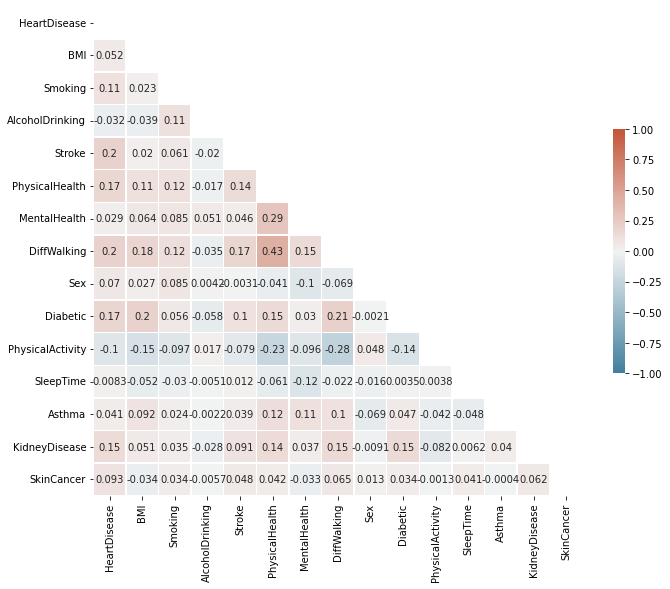

In [29]:
import matplotlib.pyplot as plt

corr = data_copy.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

# 4.Exploration and Questions 

## 4.1 Race

After data exploration and cleaning, our first task is to explore the differences in heart disease rates that might exist in race. We will then attempt to identify the variables which are impacting heart disease, and see how they are impacting different races. 

### 4.1.1 How is Heart Disease Correlated with Race for different Age Categories

Text(0.5, 0.98, 'Heart Disease Correlation with Race for AgeCategories')

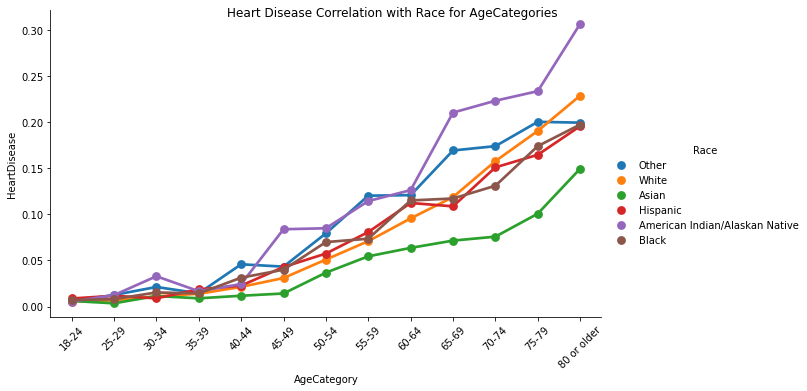

In [30]:
g=sns.catplot(x='AgeCategory',y='HeartDisease',data=data_copy.sort_values('AgeCategory'),kind='point',hue='Race',ci=None, aspect=1.75, height = 5)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Heart Disease Correlation with Race for AgeCategories')

As we see from the graph above, Asians have the lowest chance of getting heart disease cross all age categories. American Indian/Alaskan Natives have the highest change of getting heart disease across all age categories. This pattern has been consistent across almost all age categories. 


Before we make any further explorations, we first need to make sure that our results are not skewed by data size, we make a table of how many respondents are in each race. We can see that even with race with the smallest number of respondents,5200 is still a  number that statistically large enough for the purposes of our analysis. 

From the table below, we see that most of the respondents are White (over 240,000), while the smallest number of respondents is Native American (~5,200). This is also roughly consistent with demographic data in the US, where White people are the largest race group. 

In [31]:
data['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

### 4.1.2 Identifying important variables which impact Race and Heart Disease

We grouped by race to see how each variable performs for each race category and to investigate what effect race has on a different chance of getting heart disease. Especially Asian (lowest mean chance of getting heart disease  )and American Indian/ Alaskan Native (highest mean chance of getting heart disease). 

In [32]:
data_copy.groupby('Race').mean()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
Race,,,,,,,,,,,,,,,
American Indian/Alaskan Native,0.104191,29.627678,0.549020,0.059785,0.059016,4.791042,5.036332,0.206651,0.461938,0.206651,0.717801,7.056709,0.170511,0.047674,0.032680
Asian,0.032970,25.218303,0.227938,0.033218,0.018716,1.630640,2.755454,0.055404,0.517848,0.108949,0.806767,6.918691,0.098042,0.016981,0.006941
Black,0.075374,30.169993,0.344740,0.044553,0.054754,3.696935,4.211561,0.188151,0.408300,0.201752,0.709752,6.992763,0.160164,0.043812,0.006016
Hispanic,0.052576,28.818086,0.305035,0.055309,0.021679,3.227137,4.188297,0.129600,0.469394,0.143700,0.698317,7.035014,0.138381,0.030095,0.015084
Other,0.081076,28.748967,0.454887,0.075403,0.043558,4.052343,5.225750,0.154466,0.498536,0.147145,0.779374,6.860359,0.184846,0.034773,0.043924
White,0.091786,28.153422,0.432124,0.072729,0.037861,3.354310,3.790924,0.135911,0.480042,0.127347,0.790133,7.131054,0.129284,0.037449,0.116475


We found the 8 following features that might make the different races have different chances of getting heart disease that needs further analysis, **these features are baed on them having the largest disparity between the races. Thus we are identifying variables where there is disparity between races, and then mapping out their impact on heart disease**:

- Smoking   

The smoking percentage of different races is different and American Indian/Alaskan Native has the highest percentage of smoking, Asian has the lowest chance of smoking.

- AlcoholDrinking 

The AlcoholDrinking percentage of a different race are different and American Indian/Alaskan Native has the highest percentage of AlcoholDrinking, Asian has the lowest chance of AlcoholDrinking

- Stroke

The Stroke percentage of a different race are different and American Indian/Alaskan Native has the highest percentage of Stroke, Asian has the lowest chance of Stroke

- PhysicalHealth

The PhysicalHealth percentage of a different race are different American Indian/Alaskan Native has the highest number of days of feeling not good in physical health, Asian has the lowest number of days of feeling not good in physical health

- MentalHealth

The MentalHealth percentage of a different race are different American Indian/Alaskan Native has the highest number of days of feeling not good in mental health, Asian has the lowest number of days of feeling not good in physical health


- DiffWalking
  
The DiffWalking percentage of a different race are different and American Indian/Alaskan Native has the highest percentage of DiffWalking, Asian has the lowest chance of DiffWalking


- Diabetic

The Diabetic percentage of a different race are different and American Indian/Alaskan Native has the highest percentage of Diabetic, Asian has the lowest chance of Diabetic


- KidneyDisease

The KidneyDisease percentage of a different race are different and American Indian/Alaskan Native has the highest percentage of KidneyDisease, Asian has the lowest chance of KidneyDisease

The order of race sorted by mean chance of getting heart across age category is (highest to lowest) American Indian/Alaskan Native, White, Other, Black, Hispanic, Asian

### 4.1.3 Visulization on race 

Let's use visualization to see how these variables affect differently on different races.


#### Stroke



Stroke has a different impact on different races, American Indians/Alaskan Native is most sensitive to Stroke with the largest difference in getting heart disease compared with people who have Stroke and those who don't. 

Since there is the largest percentage of people who have a stroke in American Indian/Alaskan Natives compared to other races and American Indian/Alaskan Native people are most sensitive to Stroke, meaning that they might be a large percentage of American Indian/Alaskan Natives affected by stroke might get heart disease due to stroke. Therefore, we think Stroke might be one of the main effects that make American Indians/Alaskan Native has the highest chance of getting heart disease.

Text(0.5, 0.98, 'Visualizing Stroke on Race')

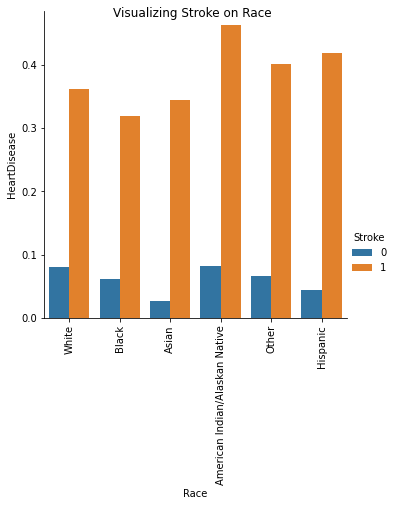

In [33]:
data_copy['HeartDisease'] = data_copy['HeartDisease'].replace('No', 0)
data_copy['HeartDisease'] = data_copy['HeartDisease'].replace('Yes', 1)
g=sns.catplot(x='Race',y='HeartDisease',data=data_copy,kind='bar',hue='Stroke',ci=None)

g.set_xticklabels(rotation=90);
g.fig.suptitle('Visualizing Stroke on Race')

In [34]:
data_copy[data_copy.Stroke==1].groupby('Race').mean()['HeartDisease']-data_copy[data_copy.Stroke==0].groupby('Race').mean()['HeartDisease'].sort_values()

Race
American Indian/Alaskan Native    0.380825
Asian                             0.317340
Black                             0.258021
Hispanic                          0.374020
Other                             0.334766
White                             0.280085
Name: HeartDisease, dtype: float64

Let's see if our inference is correct.  
It looks like that stroke might be indeed a main effect since American Indian/Alaskan Natives have the highest chance of getting stroke across all age categories.
So in essence our results are compounded for native americans, not only does a stroke impact them the most, they also have the highest chance of getting strokes.

Text(0.5, 0.98, 'Visualizing Stroke on Race')

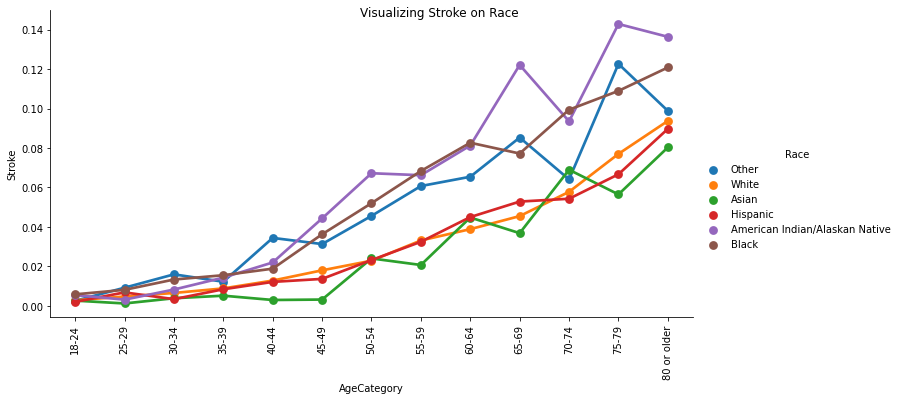

In [35]:
data_copy['Stroke'] = data_copy['Stroke'].replace('No', 0)
data_copy['Stroke'] = data_copy['Stroke'].replace('Yes', 1)
g=sns.catplot(x='AgeCategory',y='Stroke',data=data_copy.sort_values('AgeCategory'),kind='point',hue='Race',ci=None, aspect=2)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Visualizing Stroke on Race')

#### Dificulty Walking

let's see DiffWalking


Text(0.5, 0.98, 'Visualizing DiffWalking on Race')

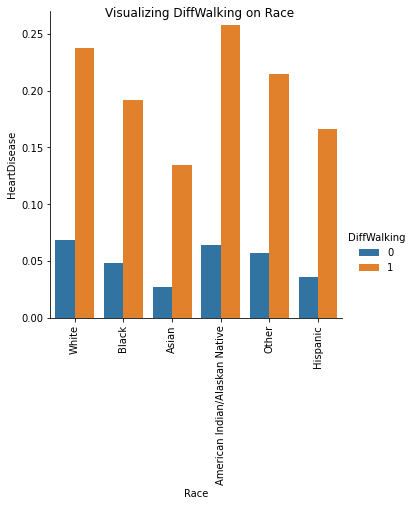

In [36]:
g=sns.catplot(x='Race',y='HeartDisease',data=data_copy,kind='bar',hue='DiffWalking',ci=None)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Visualizing DiffWalking on Race')

DiffWalking have a different impact on the different race, American Indians/Alaskan Native is most sensitive to DiffWalking with the largest difference in getting heart disease compared with people who have DiffWalking and those who don't. 

Since there is the largest percentage of people who have DiffWalking  in American Indian/Alaskan Natives compared to other races and American Indian/Alaskan Native people are most sensitive to DiffWalking , meaning that they might be a large percentage of American Indian/Alaskan Natives affected by DiffWalking  might get heart disease due to DiffWalking .Therefore, we think DiffWalking might be one of the main effects that make American Indians/Alaskan Native has the highest chance of getting heart disease.

In [37]:
data_copy[data_copy.DiffWalking==1].groupby('Race').mean()['HeartDisease']-data_copy[data_copy.DiffWalking==0].groupby('Race').mean()['HeartDisease'].sort_values()

Race
American Indian/Alaskan Native    0.193463
Asian                             0.107198
Black                             0.142892
Hispanic                          0.130809
Other                             0.157745
White                             0.168489
Name: HeartDisease, dtype: float64

let's see if our assumption is correct 

It looks like that DiffWalking might be indeed a main effect since American Indian/Alaskan Natives have the highest chance of getting DiffWalking across all age categories and Asian have the lowest chance of getting DiffWalking across all age categories

Text(0.5, 0.98, 'Visualizing DiffWalking on Race')

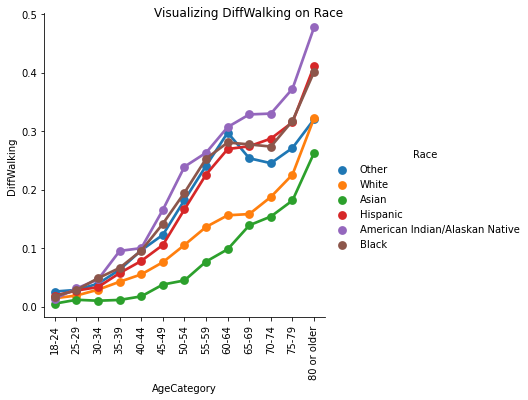

In [38]:
g=sns.catplot(x='AgeCategory',y='DiffWalking',data=data_copy.sort_values('AgeCategory'),kind='point',hue='Race',ci=None)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Visualizing DiffWalking on Race')

We already found two variables stroke and diffwalking might be the main effect that makes a different race of getting heart disease. 
We want to see their combined effect, and if the two variables have a high correlation between them.

It looks like the two variables correlate because people who have a stroke also have a higher percentage of getting diffwalking. 

In [39]:
data_copy.groupby('Stroke').mean()['DiffWalking']

Stroke
0    0.126944
1    0.442953
Name: DiffWalking, dtype: float64

let see whether it is the case  true for differnce race 

Yes, it is. Comparing the two tables. For all races, the percentage of diffWalking is much higher for people who have a stroke 

Races of getting diffwalking with stroke

In [40]:
data_copy[data_copy.Stroke==1].groupby('Race').mean()['DiffWalking']

Race
American Indian/Alaskan Native    0.579805
Asian                             0.377483
Black                             0.520701
Hispanic                          0.494118
Other                             0.489496
White                             0.423309
Name: DiffWalking, dtype: float64

Races of getting diffwalking without stroke

In [41]:
data_copy[data_copy.Stroke==0].groupby('Race').mean()['DiffWalking']

Race
American Indian/Alaskan Native    0.183248
Asian                             0.049261
Black                             0.168888
Hispanic                          0.121522
Other                             0.139208
White                             0.124602
Name: DiffWalking, dtype: float64

How is their combina effect on heart disease for different races? 

#### Diabetes

let's see Diabetic.

Diabetic has a different impact on different races, White is the most sensitive to Diabetic with the largest difference in getting heart disease compared with people Diabetic and those who don't, while Asian are least sensitive to Diabetic. 

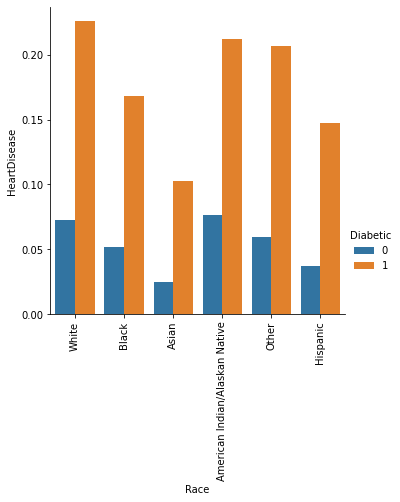

In [42]:
g=sns.catplot(x='Race',y='HeartDisease',data=data_copy,kind='bar',hue='Diabetic',ci=None)
g.set_xticklabels(rotation=90);

In [43]:
data_copy[data_copy.Diabetic==1].groupby('Race').mean()['HeartDisease']-data_copy[data_copy.Diabetic==0].groupby('Race').mean()['HeartDisease'].sort_values()

Race
American Indian/Alaskan Native    0.136009
Asian                             0.077907
Black                             0.116442
Hispanic                          0.110635
Other                             0.147755
White                             0.153679
Name: HeartDisease, dtype: float64

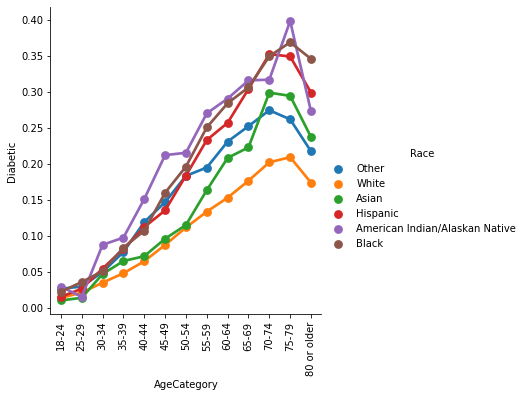

In [44]:
g=sns.catplot(x='AgeCategory',y='Diabetic',data=data_copy.sort_values('AgeCategory'),kind='point',hue='Race',ci=None)
g.set_xticklabels(rotation=90);

### 4.1.4 Other Variables: 

#### Smoking

Let's see smoking first, one of the variables we found that might make the difference that affects different races to have a different chance of getting heart disease 

In [45]:
#g=sns.catplot(x='Race',y='HeartDisease',data=data_copy,kind='bar',hue='Smoking',ci=None)
#g.set_xticklabels(rotation=90);

We first see that across all race categories, those who smoke have much higher probability of having heart disease than non smokers.

Our logic is that if we wish to see the impact of smoking on different races, we should see the additional impact that smoking has on a race's probability of getting heart disease. 

Therefore we select people who smoking group by race, and select people who don't smoke group by race and do the difference in their chance of getting heart disease, which is the gap distance between smoking and no smoking (distance between organge line and blue line )in each race of the above graph

Smoking has a different impact on the different race, 'black' is the most sensitive to smoking with the largest difference in getting heart disease compared with people smoking and those who don't, while 'Hispanic'  is least sensitive to smoking. 

For Asians we see that the impact of smoking is ~0.411, which is the second lowest, thus smoking has one of the lowest impacts of heart disease on Asians. Whereas for American Indians, the impact is ~0.609, which is one of the highest. 

In [46]:
data_copy[data_copy.Smoking==1].groupby('Race').mean()['HeartDisease']-data_copy[data_copy.Smoking==0].groupby('Race').mean()['HeartDisease'].sort_values()

Race
American Indian/Alaskan Native    0.060894
Asian                             0.041110
Black                             0.062902
Hispanic                          0.034002
Other                             0.052023
White                             0.061692
Name: HeartDisease, dtype: float64

#### AlcoholDrinking

Let's see AlcoholDrinking, one of the variables we found that might make the difference that affects different race to have a different chance of getting heart disease 

It looks like AlcoholDrinking has a different impact on different race, American Indian/Alaskan Native is most sensitive to AlcoholDrinking with the largest difference in getting heart disease compared with people who AlcoholDrinking and those who don't, while Asian are less sensitive to AlcoholDrinking. 

And also we can tell that AlcoholDrinking lowers the chance of getting heart disease. 




In [47]:
data_copy[data_copy.AlcoholDrinking==1].groupby('Race').mean()['HeartDisease']-data_copy[data_copy.AlcoholDrinking==0].groupby('Race').mean()['HeartDisease'].sort_values()

Race
American Indian/Alaskan Native   -0.052678
Asian                            -0.014805
Black                            -0.035876
Hispanic                         -0.008933
Other                            -0.033873
White                            -0.040389
Name: HeartDisease, dtype: float64

We will now look at other variables, that did not have the most outsized impacts, but were still useful for our overalll analysis.

#### PhysicalHealth

Let's see PhysicalHealth.  
PhysicalHealth has a different impact on different race, other race is most sensitive to PhysicalHealth with the largest difference in the number of feeling not good compared with people who have heart disease and those who don't. While Asian is the least sensitive race to PhysicalHealth

In [48]:
data_copy[data_copy.HeartDisease==1].groupby('Race').mean()['PhysicalHealth']-data_copy[data_copy.HeartDisease==0].groupby('Race').mean()['PhysicalHealth'].sort_values()

Race
American Indian/Alaskan Native    5.971337
Asian                             3.561986
Black                             5.391327
Hispanic                          5.747240
Other                             6.275896
White                             4.655728
Name: PhysicalHealth, dtype: float64

#### MentalHealth

MentalHealth have different impact on different race, Hispanic race is most sensitive to MentalHealth with the largest differece in numer  of feeling not good  compared with people haveheart disease and those don't. While White is the leaset sensitive race to MentalHealth

In [49]:
data_copy[data_copy.HeartDisease==1].groupby('Race').mean()['MentalHealth']-data_copy[data_copy.HeartDisease==0].groupby('Race').mean()['MentalHealth'].sort_values()

Race
American Indian/Alaskan Native    2.165285
Asian                             0.975972
Black                             1.897324
Hispanic                          2.559581
Other                             1.746553
White                             0.541147
Name: MentalHealth, dtype: float64

#### PhysicalActivity

let's see  PhysicalActivity 

PhysicalActivity have a different impact on different race, American Indian/Alaskan Native is most sensitive to PhysicalActivity with the largest difference in getting heart disease compared with people PhysicalActivity and those who don't, while Asian are least sensitive to PhysicalActivity. 

In [50]:
data_copy[data_copy.PhysicalActivity==1].groupby('Race').mean()['HeartDisease']-data_copy[data_copy.PhysicalActivity==0].groupby('Race').mean()['HeartDisease'].sort_values()

Race
American Indian/Alaskan Native   -0.100640
Asian                            -0.014788
Black                            -0.050822
Hispanic                         -0.027269
Other                            -0.068931
White                            -0.077997
Name: HeartDisease, dtype: float64

Besides, we can also see that even American Indian/Alaskan Native is most sensitive to PhysicalActivity, and PhysicalActivity might relate to reducing the chance of getting heart disease, American Indian/Alaskan Native is not the top race that loves doing PhysicalActivity (71.8%). 

In [51]:
data_copy.groupby('Race').mean()['PhysicalActivity']

Race
American Indian/Alaskan Native    0.717801
Asian                             0.806767
Black                             0.709752
Hispanic                          0.698317
Other                             0.779374
White                             0.790133
Name: PhysicalActivity, dtype: float64

#### Sleeptime

Lets see sleeptime

In [52]:
data_copy[data_copy.HeartDisease==1].groupby('Race').mean()['SleepTime']-data_copy[data_copy.HeartDisease==0].groupby('Race').mean()['SleepTime'].sort_values()

Race
American Indian/Alaskan Native   -0.120974
Asian                            -0.153061
Black                             0.004073
Hispanic                         -0.164231
Other                            -0.102286
White                             0.061316
Name: SleepTime, dtype: float64

Since there is a small difference in sleep time between them (only showing a few minutes difference in sleep time), we categorized sleep time according to CDC criteria to see if there are interesting patterns between different sleep statuses. 

In [53]:
data_copy.loc[data_copy.SleepTime<7,'SleepTime_range']='undersleep' 
data_copy.loc[(7<=data_copy.SleepTime ) & (data_copy.SleepTime<=9),'SleepTime_range']='healthSleep' 
data_copy.loc[(9<data_copy.SleepTime ) & (data_copy.SleepTime<=24),'SleepTime_range']='oversleep'

It looks like whatever their sleep time status is, they follow a similar pattern of getting heart disease for each race.   
However, interestingly, people who oversleep have a higher chance of getting heart disease than people who undersleep. And healthy sleep time does have the lowest chance of getting heart disease

In [54]:
#g=sns.catplot(x='Race',y='HeartDisease',data=data_copy,kind='point',hue='SleepTime_range',ci=None)
#g.set_xticklabels(rotation=90);

In [55]:
#g=sns.catplot(x='Race',data=data_copy,kind='count',hue='SleepTime_range',ci=None)
#g.set_xticklabels(rotation=90);

#### Genhealth

Let's see GenHealth 

We can tell that those who think they have better general health status have a lower chance of getting heart disease. The effect on different races is similar, so we don't think that Genhealth is the main effect that causes race differences in getting heart disease. 

In [56]:
#g=sns.catplot(x='Race',y='HeartDisease',data=data_copy,kind='point',hue='GenHealth',ci=None)
#g.set_xticklabels(rotation=90);

#### Asthma 

Let's see Asthma  

Asthmahave different impact on the different race, American Indians/Alaskan Native is the most sensitive to Asthma with the largest difference in getting heart disease compared with people with Asthma and those who don't, while White is least sensitive to Asthma. 
However, American Indian/Alaskan Native people don't have a significantly larger percentage of people having Asthma, meaning that even if they are sensitive to Asthma, there is not a significantly larger percentage of people affected by Asthma compared to other races. So we think Asthma might not be one of the strongest effects that make American Indians/Alaskan Natives have the highest chance of getting heart disease. Similar conclusion to other races. 

In [57]:
data_copy[data_copy.Asthma==1].groupby('Race').mean()['HeartDisease']-data_copy[data_copy.Asthma==0].groupby('Race').mean()['HeartDisease'].sort_values()

Race
American Indian/Alaskan Native    0.070109
Asian                             0.040537
Black                             0.040860
Hispanic                          0.051129
Other                             0.046293
White                             0.029496
Name: HeartDisease, dtype: float64

#### KidneyDisease

Let's see KidneyDisease

KidneyDisease has a different impact on different races, Other race is the most sensitive to KidneyDisease with the largest difference in getting heart disease compared with people who have KidneyDisease and those who don't. While Asian is the least sensitive race

In [58]:
data_copy[data_copy.KidneyDisease==1].groupby('Race').mean()['HeartDisease']-data_copy[data_copy.KidneyDisease==0].groupby('Race').mean()['HeartDisease'].sort_values()

Race
American Indian/Alaskan Native    0.233557
Asian                             0.114968
Black                             0.203180
Hispanic                          0.170472
Other                             0.264980
White                             0.218589
Name: HeartDisease, dtype: float64

We skip SkinCancer because the percentage of people getting SkinCancer for each race is similar, which means that SkinCancer has a low chance to be the variable that makes a different race have a difference in getting heart disease. we feel no need to dive deeper 

#### Weight Status

Let's see weight_status 

We can tell White is most sensitive to weight status. For each weight_status, the mean chance of getting a heart shows a significant difference compared with other races.

In [59]:
#g=sns.catplot(x='Race',y='HeartDisease',data=data_copy,kind='point',hue='weight_status',ci=None)
#g.set_xticklabels(rotation=90);

### 4.1.5Combined Effect on Race 

So far, We mainly see a single effect on race, now we try to see some combined effect on heart disease. For the Combine effect, we just simply randomly picked variables we thought might be interesting or correlated and picked some that are significant 

Let's combine SleepTime_range and  AlcoholDrinking

We have known that AlcoholDrinking can lower heart disease, However, for oversleeping Asians, drinking increases their chance of getting heart disease, while the effect is reversed for other races. More interestingly, for overslept American Indian/ Alaskan Natives, AlcoholDrinking effect on lowering heart disease is extremely significant. 



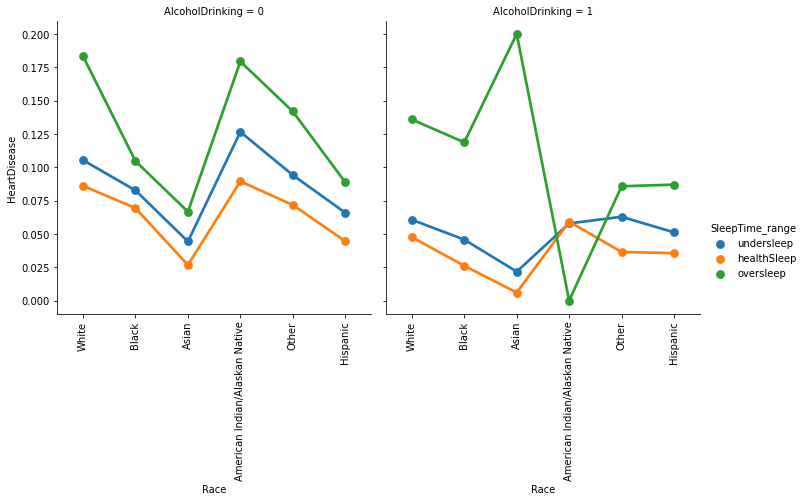

In [60]:
g=sns.catplot(x='Race',y='HeartDisease',data=data_copy,kind='point',hue='SleepTime_range',col='AlcoholDrinking',ci=None)
g.set_xticklabels(rotation=90);

We want to see if the huge drop is skewed because of data size. 

Yes, it is. According to the second table, oversleep American Indian/Alaskan Natives that do AlcoholDrinking only have 21 respondents, and versleep Asian that do AlcoholDrinking only have 10 respondents. Therefore,the effect of AlcoholDrinking might be skewed because of the small sample size. Hence, we need to be careful about the generalization of the effect of AlcoholDrinking on oversleeping American Indian/Alaskan Natives and Asian

In [61]:
data_copy[(data_copy.Race=='American Indian/Alaskan Native') &  (data_copy.AlcoholDrinking==1) ].SleepTime_range.value_counts()

healthSleep    169
undersleep     121
oversleep       21
Name: SleepTime_range, dtype: int64

In [62]:
data_copy[(data_copy.Race=='Asian') &  (data_copy.AlcoholDrinking==1) ].SleepTime_range.value_counts()

healthSleep    166
undersleep      92
oversleep       10
Name: SleepTime_range, dtype: int64

lets combine genhealth and stroke

There are trends that the better respondents feel about their general health, the chance of getting heart disease tends to be lower g when considering gen health solely. However, we introduce stroke and found that if Asian and American Indian/ Alaskan Native have a stroke, even if people feel excellent about their unhealthy, the chance of getting heart disease is still high.

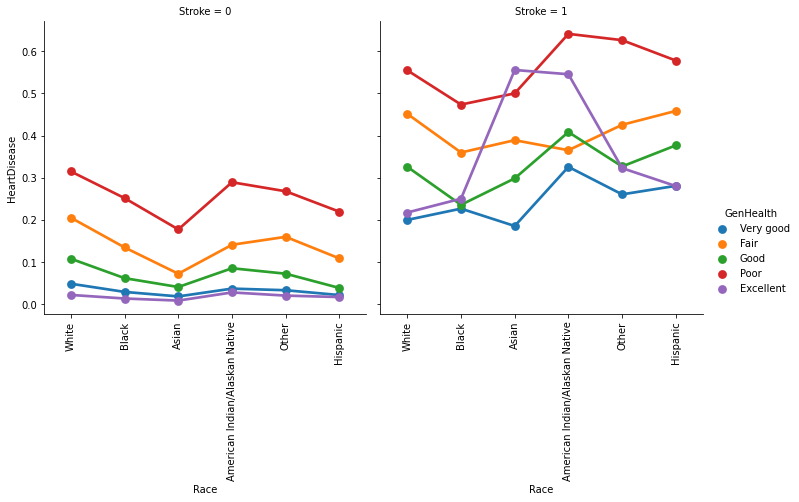

In [63]:
g=sns.catplot(x='Race',y='HeartDisease',data=data_copy,kind='point',hue='GenHealth',col='Stroke',ci=None)
g.set_xticklabels(rotation=90);

It is because Asian and American Indian/ Alaskan Natives tend to think highly of their general health? 


No, they don't have this tendency according to the tables. There might be other reasons.

In [64]:
data_copy[data_copy.Race=='Asian']['GenHealth'].value_counts()

Very good    2798
Good         2435
Excellent    2222
Fair          495
Poor          118
Name: GenHealth, dtype: int64

In [65]:
data_copy[data_copy.Race=='American Indian/Alaskan Native']['GenHealth'].value_counts()

Good         1806
Very good    1356
Excellent     847
Fair          845
Poor          348
Name: GenHealth, dtype: int64

Or it is because the sample size makes the result skewed? 

Looks like the sample size could be one of the reasons that make the result skewed with only about 10 respondents who felt excellent about their general health both in Asian and American Indian/Alaskan Native. While there are at least 50 people who feel excellent from other races 

In [66]:
data_copy[(data_copy.Stroke==1) ].groupby('Race').GenHealth.value_counts()

Race                            GenHealth
American Indian/Alaskan Native  Good           98
                                Poor           92
                                Fair           63
                                Very good      43
                                Excellent      11
Asian                           Good           57
                                Fair           36
                                Very good      27
                                Poor           22
                                Excellent       9
Black                           Fair          456
                                Good          378
                                Poor          207
                                Very good     159
                                Excellent      56
Hispanic                        Fair          192
                                Good          162
                                Poor          109
                                Very good      82
        

# Incorporating Race and Gender

We have focused on Race before, now we are trying to incooperate anpther demographic variables: gender 

In [67]:
race = ['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic']
sex = ['Male', 'Female']

factors = [('American Indian/Alaskan Native', 'Female'), ('American Indian/Alaskan Native', 'Male'),
           ('Asian','Female'), ('Asian','Male'),
           ('Black', 'Female'), ('Black', 'Male'),
           ('Hispanic', 'Female'), ('Hispanic', 'Male'),
           ('Other', 'Female'), ('Other', 'Male'),
           ('White', 'Female'), ('White','Male')]

In [68]:
### Race&Sex vs Heart Disease
from bokeh.io import output_notebook
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.models import FactorRange
output_notebook()
fig = figure(x_range = FactorRange(*factors), y_axis_label='HeartDisease', width=600, height=400)
fig.vbar(x=factors, top=data_copy.groupby(['Race','Sex'])['HeartDisease'].mean(), width=0.9)
fig.xaxis.major_label_orientation = 45
output_file(filename='race_sex_bar_plot.html')
show(fig)


In [69]:
data_copy.groupby(['Race','Sex'])['HeartDisease'].mean()

Race                            Sex
American Indian/Alaskan Native  0      0.093605
                                1      0.116521
Asian                           0      0.022365
                                1      0.042843
Black                           0      0.072571
                                1      0.079436
Hispanic                        0      0.048273
                                1      0.057440
Other                           0      0.070255
                                1      0.091960
White                           0      0.069114
                                1      0.116343
Name: HeartDisease, dtype: float64

In each race, it is clear that probability of having heart dieases is bigger for men compared to women. Let's see the proportion of number of each sex in our dataset to try to make suer that statistic result is skewed by data size. The difference between man and women is largest in white and smallest in black. 

In [70]:
data_copy['Sex'].value_counts()

0    167805
1    151990
Name: Sex, dtype: int64

It is very close to each other. So, it can be assumed that we have a balanced data.

Below showing that the overall difference between men and women getting heart disease is about 0.04.
And since white is the only race that women and men differ in getting a heart disease that is higher than 0.04, we got 0.047. Besides, white is the second race that has the highest mean chance of getting heart disease, and we also have the most respondents white, so it will be more valuable to look into the difference between men and women in white.

In [71]:
data_copy[data_copy.Sex==1]['HeartDisease'].mean()-data_copy[data_copy.Sex==0]['HeartDisease'].mean()

0.03923786373662269

So we have know that man and women have the highest difference in White with the value of 0.047.But the question is whether it's because men genetically tend to have a higher chance of getting heart disease in white or there might be other reasons like women tend to have a healthier lifestyle than men do.  We will use a grounpby function to look into that. 

Select only white race and see how men and women differ in the following features. The table shows some variable show large difference between man and women: 
Smoking,physicalhealth,mentalhealth,diffwalking,asthma and the  categorical variables of muti-levelsthat haven't be convered in the following table: AgeCategory,GenHealth,weight_status,SleepTime_range



In [72]:
data_copy[data_copy.Race=='White'].groupby('Sex').mean()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
Sex,,,,,,,,,,,,,,
0,0.069114,27.834257,0.39818,0.073357,0.038463,3.677953,4.575804,0.158267,0.123349,0.774400,7.159192,0.151059,0.039263,0.112753
1,0.116343,28.499127,0.46889,0.072049,0.037209,3.003755,2.940779,0.111696,0.131677,0.807173,7.100576,0.105699,0.035485,0.120506


After checking the difference between men and women in the table above, we see that the above table does not show any signficant differences, thus we categorize by sleep time for a deep dive.

In [73]:
data_copy.loc[data_copy.SleepTime<7,'SleepTime_range']='undersleep' 
data_copy.loc[(7<=data_copy.SleepTime ) & (data_copy.SleepTime<=9),'SleepTime_range']='healthSleep' 
data_copy.loc[(9<data_copy.SleepTime ) & (data_copy.SleepTime<=24),'SleepTime_range']='oversleep'

We group by sleeptimerange. It shows that overslpeeing people might have higher chance of getting heart disease than undersleep. 

In [74]:
data_copy.groupby('SleepTime_range').mean()['HeartDisease']

SleepTime_range
healthSleep    0.077481
oversleep      0.159615
undersleep     0.094570
Name: HeartDisease, dtype: float64

In [75]:
data_copy[(data_copy.Sex==1) ]['SleepTime_range'].value_counts()

healthSleep    100502
undersleep      46435
oversleep        5053
Name: SleepTime_range, dtype: int64

In [76]:
data_copy[(data_copy.Sex==0) ]['SleepTime_range'].value_counts()

healthSleep    110892
undersleep      50551
oversleep        6362
Name: SleepTime_range, dtype: int64

Oversleep will affect women and male , but oversleep have more impact on white men, and that might be a reason why men are more susceptible to heart disease, as white men are the majority of men in our dataseret.

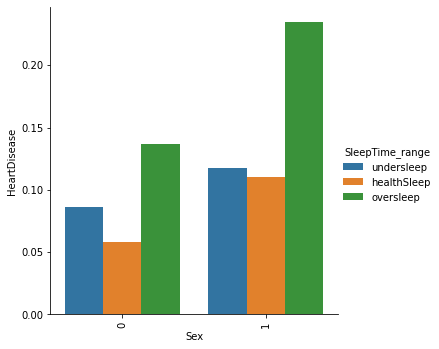

In [77]:
g=sns.catplot(x='Sex',y='HeartDisease',data=data_copy[data_copy.Race=='White'],kind='bar',hue='SleepTime_range',ci=None)
g.set_xticklabels(rotation=90);

#5.Machine Learning

###5.1 Feature Engineering

In [78]:
#@title 5.1.1 Age
#data_copy = data_copy_ml
data_copy_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [79]:
data_copy_ml.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Before starting the PCA process, we first need to make a use of agecategory column since it has a great impact on the outcome vatiable, HeartDisease.

In order to get the most out of PCA, we need to use only numerical variables, so we decided to convert age categories into random integers in their respected intervals.

First, we changed '80 or older' category to '80-90' to be able to generate random integers by using string split method then converting those into integers.

In [80]:
from scipy.stats import randint

#creating another copy of the processed dataset
data_ml=data_copy_ml.copy()

data_ml['AgeCategory']=data_ml['AgeCategory'].replace('80 or older', '80-90')

age_cat = data_ml['AgeCategory'].unique()
#creating an empty list instead of numpy array because lists are faster compared numpy
#counterparts in operations like appending
age =[]
#taking the transpose of the dataset to be able to iterate each the columns in a for loop. 
#(Using rows as columns)
data_ml_T = data_ml.T

#Below loop is generating a random integer respecting the given intervals for each row (in transpose, it is columns)
#and adding the new values to the empty list, age.
for i in data_ml_T:
  age.append(np.random.randint(int(data_ml_T[i][9].split('-')[0]), int(data_ml_T[i][9].split('-')[1])+1))
age
#Converting age to pandas series and giving it a name, 'Age'. It is not possible to merge a pandas series
#to a dataframe without a name.
age_series = pd.Series(age, name='Age')
#checking to see if they have the same index
age_series.index
data_copy.index

#merging age to the main dataset
data_copy_age = pd.merge(data_copy, age_series, left_index=True, right_index=True)
data_copy_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In next steps, we are going to convert categorical variables to numerical to be able to use them in PCA.

In [81]:
#@title 5.1.2 Smoking
#Checking the unique values:
data_copy_age['Smoking'].value_counts()
data_copy_age['HeartDisease'] = data_copy_age['HeartDisease'].replace('No', 0)
data_copy_age['HeartDisease'] = data_copy_age['HeartDisease'].replace('Yes', 1)
data_copy_age['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [82]:
#Creating a copy
data_copy_age2 = data_copy_age.copy()

data_copy_age2['Smoking'] = data_copy_age2['Smoking'].replace('No', 0)
data_copy_age2['Smoking'] = data_copy_age2['Smoking'].replace('Yes', 1)

In [83]:
#@title 5.1.3 Stroke
data_copy_age2['Stroke'].value_counts()

0    307726
1     12069
Name: Stroke, dtype: int64

In [84]:
data_copy_age2['Stroke'] = data_copy_age2['Stroke'].replace('No', 0)
data_copy_age2['Stroke'] = data_copy_age2['Stroke'].replace('Yes', 1)

In [85]:
#@title 5.1.4 DiffWalking
data_copy_age2['DiffWalking'].value_counts()

0    275385
1     44410
Name: DiffWalking, dtype: int64

In [86]:
data_copy_age2['DiffWalking'] = data_copy_age2['DiffWalking'].replace('No', 0)
data_copy_age2['DiffWalking'] = data_copy_age2['DiffWalking'].replace('Yes', 1)

In [87]:
#@title 5.1.5 Diabetic
data_copy_age2['Diabetic'].value_counts()

0    276434
1     43361
Name: Diabetic, dtype: int64

In [88]:
data_copy_age2['Diabetic'] = data_copy_age2['Diabetic'].replace('No', 0)
data_copy_age2['Diabetic'] = data_copy_age2['Diabetic'].replace('Yes', 1)

In [89]:
#@title 5.1.6 Sex
data_copy_age2['Sex'].value_counts()

0    167805
1    151990
Name: Sex, dtype: int64

In [90]:
data_copy_age2['Sex'] = data_copy_age2['Sex'].replace('Female', 0)
data_copy_age2['Sex'] = data_copy_age2['Sex'].replace('Male', 1)

In [91]:
#@title 5.1.7 AlcoholDrinking
data_copy_age2['AlcoholDrinking'].value_counts()

0    298018
1     21777
Name: AlcoholDrinking, dtype: int64

In [92]:
data_copy_age2['AlcoholDrinking'] = data_copy_age2['AlcoholDrinking'].replace('No', 0)
data_copy_age2['AlcoholDrinking'] = data_copy_age2['AlcoholDrinking'].replace('Yes', 1)

In [93]:
#@title 5.1.8 GenHealth
data_copy_age2['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

Since GenHealth does not have binary values, it wouldn't make sense to convert them to 0 and 1.

By doing that, we might lose its impact. A better method is to use label encoding since the values have prevalance with one and other. (i.e. Poor=1, Fair=2, Good=3, Very good=4, Excellent=5)

In [94]:
#Since GenHealth does not have binary values, it wouldn't make sense to convert them to 0 and 1.
#By doing that, we might lose its impact. A better method is to use label encoding since the
#values have prevalance with one and other. (i.e. Poor=1, Fair=2, Good=3, Very good=4, Excellent=5)

data_copy_age2['GenHealth'] = data_copy_age2['GenHealth'].replace('Poor', 5)
data_copy_age2['GenHealth'] = data_copy_age2['GenHealth'].replace('Fair', 4)
data_copy_age2['GenHealth'] = data_copy_age2['GenHealth'].replace('Good', 3)
data_copy_age2['GenHealth'] = data_copy_age2['GenHealth'].replace('Very good', 2)
data_copy_age2['GenHealth'] = data_copy_age2['GenHealth'].replace('Excellent', 1)

data_copy_age2['GenHealth'].value_counts()

2    113858
3     93129
1     66842
4     34677
5     11289
Name: GenHealth, dtype: int64

In [95]:
#@title 5.1.9 Asthma
data_copy_age2['Asthma'].value_counts()

0    276923
1     42872
Name: Asthma, dtype: int64

In [96]:
data_copy_age2['Asthma'] = data_copy_age2['Asthma'].replace('No', 0)
data_copy_age2['Asthma'] = data_copy_age2['Asthma'].replace('Yes', 1)

In [97]:
#@title 5.1.10 KidneyDisease
data_copy_age2['KidneyDisease'].value_counts()

0    308016
1     11779
Name: KidneyDisease, dtype: int64

In [98]:
data_copy_age2['KidneyDisease'] = data_copy_age2['KidneyDisease'].replace('No', 0)
data_copy_age2['KidneyDisease'] = data_copy_age2['KidneyDisease'].replace('Yes', 1)

In [99]:
#@title 5.1.11 SkinCancer
data_copy_age2['SkinCancer'].value_counts()

0    289976
1     29819
Name: SkinCancer, dtype: int64

In [100]:
data_copy_age2['SkinCancer'] = data_copy_age2['SkinCancer'].replace('No', 0)
data_copy_age2['SkinCancer'] = data_copy_age2['SkinCancer'].replace('Yes', 1)

In [101]:
#@title 5.1.12 PhysicalActivity
data_copy_age2['PhysicalActivity'].value_counts()

1    247957
0     71838
Name: PhysicalActivity, dtype: int64

In [102]:
data_copy_age2['PhysicalActivity'] = data_copy_age2['PhysicalActivity'].replace('No', 0)
data_copy_age2['PhysicalActivity'] = data_copy_age2['PhysicalActivity'].replace('Yes', 1)

In [103]:
#@title 5.1.13 Race

Unfortunately, we can not label code Race as we did in GenHealth because PCA would get confused and interpret the label codes as there is a prevalance between different races. It is better leave Race out in principal component analysis. 

In [104]:
#@title 5.1.14 HeartDisease
data_copy_age2['HeartDisease'] = data_copy_age2['HeartDisease'].replace('No', 0)
data_copy_age2['HeartDisease'] = data_copy_age2['HeartDisease'].replace('Yes', 1)
data_copy_age2['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [105]:
data_copy_age2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

### 5.2 Random Forest

In [106]:
data_copy_age.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'weight_status',
       'SleepTime_range', 'Age'],
      dtype='object')

In [107]:
#@title 5.2.1 Feature Importance
data_copy_age3 = data_copy_age.drop('AgeCategory',axis=1).copy()
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 2000, 'max_depth': 8}
# One-hot encode by using drop_first = True to prevent dropping redundant columns manually
# due to having too many categorical columns
data_copy_age3 = pd.get_dummies(data_copy_age3, drop_first = True)
data_copy_age3.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Age', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_Other', 'Race_White', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good', 'weight_status_Obese',
       'weight_status_Overweight', 'weight_status_Underweight',
       'SleepTime_range_oversleep', 'SleepTime_range_undersleep'],
      dtype='object')

In get_dummies(), we used drop_first = True parameter to prevent dropping redundant columns manually since there are too many categorical columns.

Before starting, we also dropped the agecategory and weight_status columns to avoid multi-collinearity in predictors space due to the fact that we already added the 'age' column by generating random integers corresponding to each age interval for unique rows, and weight_status was generated by the BMI values of each patients.

In [108]:
from sklearn.ensemble import RandomForestClassifier
X, y = data_copy_age3.drop('HeartDisease',axis=1), data_copy_age3['HeartDisease']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(X, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

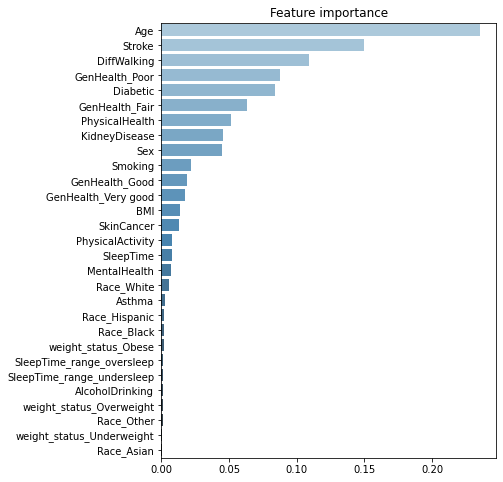

In [109]:
plt.figure(figsize=(6,8))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

The importances are in line with our EDA. The top three good features for HeartDisease are Age, Stroke, DiffWalking.

###5.3 Principal Component Analysis

In [110]:
#@title 5.3.1 Filtering Numerical Data
from sklearn.compose import make_column_selector

X_data = data_copy_age2.drop(['HeartDisease','AgeCategory','Race'], axis=1) 
y_data = data_copy_age2['HeartDisease'] 

X_data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,weight_status,SleepTime_range,Age
0,16.60,1,0,0,3.0,30.0,0,0,1,1,2,5.0,1,0,1,Underweight,undersleep,55
1,20.34,0,0,1,0.0,0.0,0,0,0,1,2,7.0,0,0,0,HealthyWeight,healthSleep,88
2,26.58,1,0,0,20.0,30.0,0,1,1,1,4,8.0,1,0,0,Overweight,healthSleep,68
3,24.21,0,0,0,0.0,0.0,0,0,0,0,3,6.0,0,0,1,HealthyWeight,undersleep,76
4,23.71,0,0,0,28.0,0.0,1,0,0,1,2,8.0,0,0,0,HealthyWeight,healthSleep,43


In [111]:
X_data = data_copy_age2[['Stroke', 'GenHealth', 'PhysicalHealth', 'DiffWalking', 'Age']] 
y_data = data_copy_age2['HeartDisease'] 
corr = data_copy_age2.corr()
corr

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.174782,-0.100030,0.243182,0.008327,0.041444,0.145197,0.093317,0.233867
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,0.200443,-0.150616,0.230720,-0.051822,0.092345,0.050768,-0.033644,-0.007307
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.055544,-0.097174,0.174717,-0.030336,0.024149,0.034920,0.033977,0.126792
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.057786,0.017487,-0.029780,-0.005065,-0.002202,-0.028280,-0.005702,-0.059875
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.104467,-0.079455,0.168090,0.011900,0.038866,0.091167,0.048116,0.137891
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.153975,-0.232283,0.482697,-0.061387,0.117907,0.142197,0.041700,0.109532
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,0.029709,-0.095808,0.241625,-0.119717,0.114008,0.037281,-0.033412,-0.154655
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.209255,-0.278524,0.413797,-0.022216,0.103222,0.153064,0.064840,0.243881
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.002054,0.048247,-0.025947,-0.015704,-0.069191,-0.009084,0.013434,-0.067836
Diabetic,0.174782,0.200443,0.055544,-0.057786,0.104467,0.153975,0.029709,0.209255,-0.002054,1.000000,-0.136599,0.270246,0.003452,0.046886,0.149113,0.034077,0.194043


While selecting which features to put in PCA, we paid attention to choose the ones that have high correlation with outcome variable, also, low colliniarity between each other. We also double checked the variables we choose with  RF feature importance results.

For the next steps, It is important to exclude outcome variable from the data we are going to fit because we are interested in the similaraties regardless of their outcome.

In [112]:
#@title 5.3.2 Scaling the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_data_std = scaler.fit_transform(X_data)

X_data_std.shape

(319795, 5)

We need to treat features equally by scaling them. if we don't scale the data before PCA, PCA always going to give bigger weight to large numbers and disregard the small numbers. (While PCA calculating the variance of each observation, it takes mean squared errors of those observations. Therefore bigger numbers will always have higher variance compared to smaller ones)

In [113]:
#@title 5.3.3 Fitting the PCA
from sklearn.decomposition import PCA 

pca = PCA()

pca.fit(X_data_std)

pca.explained_variance_ratio_

array([0.41403919, 0.19434235, 0.17390824, 0.1168843 , 0.10082592])

In [114]:
pca_2 = PCA(n_components=2)             
pca_2.fit(X_data_std)                       
X_2D = pca_2.transform(X_data_std)

Plotting PCA1 vs PCA2

In [115]:
print(abs(pca.components_[:3]))
pca.components_3 = pca.components_[:3]
importance = pd.DataFrame(abs(pca.components_3))
importance.columns = ['Stroke', 'GenHealth', 'PhysicalHealth', 'DiffWalking', 'Age']
importance.index = ['PC1', 'PC2', 'PC3']
importance

[[0.275151   0.5342363  0.51841979 0.52780078 0.30257356]
 [0.62572017 0.23158381 0.38586641 0.07546709 0.63265713]
 [0.72906938 0.0199579  0.09921196 0.11534263 0.66701768]]


,Stroke,GenHealth,PhysicalHealth,DiffWalking,Age
PC1,0.275151,0.534236,0.518420,0.527801,0.302574
PC2,0.625720,0.231584,0.385866,0.075467,0.632657
PC3,0.729069,0.019958,0.099212,0.115343,0.667018


In PC1, most important variables are GenHealth, DiffWalking, and PhysicalHealth based on the absolute coefficient magnitude.

In PC2, most important variables are Age and Stroke based on the absolute coefficient magnitude.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'PCA2 % 19.43')

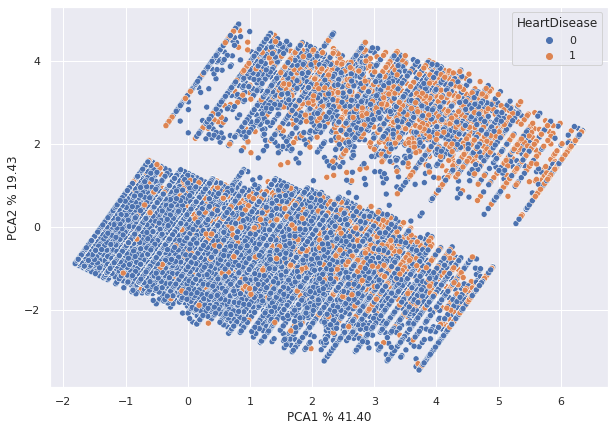

In [116]:
data_copy_age3 = data_copy_age2.copy()
data_copy_age3['PCA1'] = X_2D[:, 0]
data_copy_age3['PCA2'] = X_2D[:, 1]
sns.set(rc={"figure.figsize":(10, 7)})
sns.scatterplot("PCA1", "PCA2", hue='HeartDisease', data=data_copy_age3)
plt.xlabel('PCA1 % {0:.2f}'.format(pca.explained_variance_ratio_[0].round(4)*100))
plt.ylabel('PCA2 % {0:.2f}'.format(pca.explained_variance_ratio_[1].round(4)*100))

As we go right in PC1 axis, GenHealth get worsen (1=Excellent, 5=Poor), Diffwalking increases (1=Yes, 0=No), and PhysicalHealth get worsen (1= 1 day thinking about the physical, 30= 30 days thinking about physical health for the last 30 days). Our findings are correlated with PCA plot as frequency of orange dots (HeartDisease=1) are increasing as we go to right along PC1 axis.

As we go up in PC2 axis, Age of the patients and Difficulty of walking are increasing (1=Diff of walking, 0=No Diff of walking). Our findings are correlated with PCA plot as frequency of orange dots (HeartDisease=1) are increasing as we go up along the PC2 axis.


Since the Principal components 1 and 2 only explains the 41.41% and 19.43% variance in choosen predictors, the data points are not perfectly seperated.


Let's plot a cumulative variances in order to decide how many components we need to keep for K-means.

Text(0, 0.5, 'Cumulative Explained Variance')

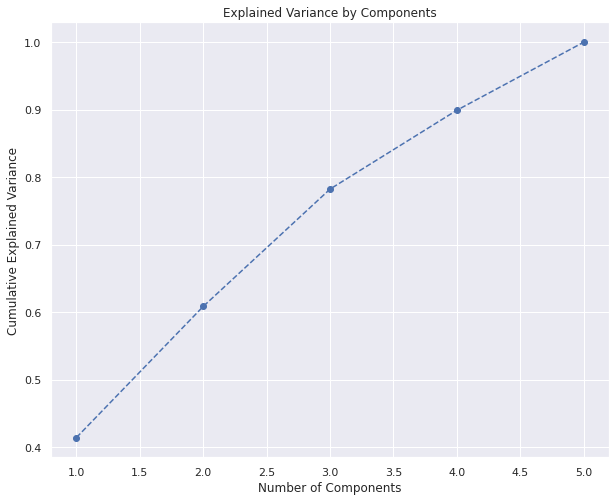

In [117]:
plt.figure(figsize= (10,8))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(),
         marker ='o', linestyle= '--')

plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

As a rule of thumb, we are going to preserve around 80% of the variance, Therefore, in this instance, we decide to keep 3 components.




In [118]:
pca = PCA(n_components = 3)
pca.fit(X_data_std)

PCA(n_components=3)

In [119]:
pca.transform(X_data_std)
scores_pca = pca.transform(X_data_std)

Eigenvalues of PC1, PC2, and PC3

In [120]:
scores_pca

array([[-0.49381204,  0.02337945, -0.11997028],
       [ 1.29758327,  4.58812469,  2.4710469 ],
       [ 1.85311257, -0.79837857, -0.34125251],
       ...,
       [-0.29238183, -0.29398028,  0.11571577],
       [-0.67093745, -1.08550983,  0.95023447],
       [ 0.28368107,  0.91052122, -1.154204  ]])

###5.4 K-Means Clustering

In [121]:
#@title 5.4.1 Combining PCA & K-Means
#Determining the Within Cluster Sum of Squares (WCSS)
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

Plotting the WCSS vs number of clusters

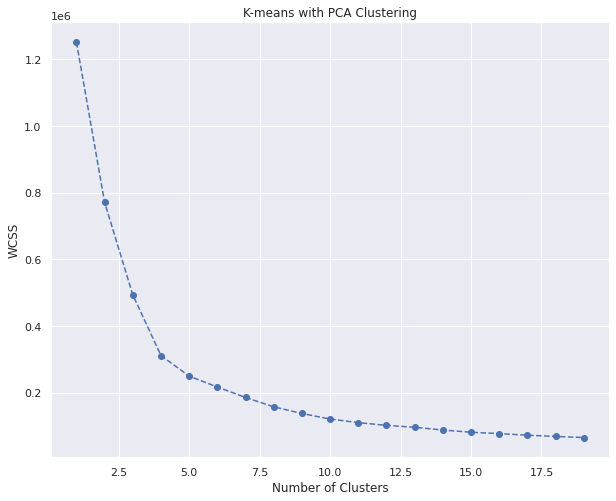

In [122]:
plt.figure(figsize=(10,8))
plt.plot(range(1,20), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

According to Elbow Method, we can choose the appropriate number of clusters by identifying an elbow point where before that point, the graph is steeply declining while the part after it is much smoother. In this case, an elbow can be seen at the 4 cluster mark.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


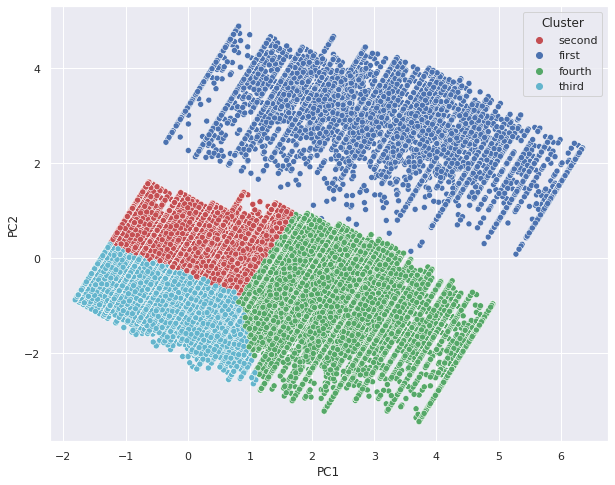

In [123]:
#2 Clusters
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state=0)
kmeans_pca.fit(scores_pca)
df_X_data_pca_kmeans = pd.concat([X_data.reset_index(drop=True),
                                  pd.DataFrame(scores_pca)], axis=1)
df_X_data_pca_kmeans.columns.values[-3:] = ['PC1', 'PC2', 'PC3']
df_X_data_pca_kmeans['K-means'] = kmeans_pca.labels_
df_X_data_pca_kmeans['Cluster'] = df_X_data_pca_kmeans['K-means'].map({
    0:'first', 1:'second', 2:'third', 3:'fourth'})
plt.figure(figsize = (10,8))
sns.scatterplot('PC1', 'PC2', data=df_X_data_pca_kmeans, hue='Cluster', palette=['r','b', 'g', 'c'])


Above graph shows the four different clustering of strongest features in two dimensional space (PC1&PC2).

In [124]:
df_X_data_pca_kmeans.head()

,Stroke,GenHealth,PhysicalHealth,DiffWalking,Age,PC1,PC2,PC3,K-means,Cluster
0,0,2,3.0,0,55,-0.493812,0.023379,-0.119970,1,second
1,1,2,0.0,0,88,1.297583,4.588125,2.471047,0,first
2,0,4,20.0,0,68,1.853113,-0.798379,-0.341253,3,fourth
3,0,3,0.0,0,76,0.168468,0.669621,-0.900220,1,second
4,0,2,28.0,1,43,2.465029,-1.821113,0.293843,3,fourth


# 6.Conclusion

We explored the disparity in heart disease between races, and explored some of the factors that have the highest correlation with race, and saw the differences in them amongst races which might explain partially the difference in the incidence of heart disease amongst races. 

The combined effect on race section explores the disparity between genders in heart disease and shows that sleep time might be one of the reasons why men have a higher chance of heart disease. 

As an additional analysis, we used PCA, and based on the results of the PCA, we used K-means by using 4 clusters. In PCA we used 5 strongest predictors and we were able to reduce the dimensions into 2 (explaining over 60% of variability). We found that gen health, diff walking, physical health, and age, if these increase, then we see more likelihood of heart disease.

# Phase 2 Questions

We have commented out several of the plots below as they are either captured entirely by other plots that we made above, or were deemed out of sync with our general story and outline. 

## Question 1
What is the relationship between heavy alcohol drinking and heart disease for each weight class?

**Answer:**

- Our data shows that people who drink alcohol heavily (*adult men having more than 14 drinks per week and adult women having more than 7 drinks per week*) have a smaller probability of getting heart disease than people who do not.
- The  Alcohol drinking impact on heart disease follows the same pattern for all weight statuses. 
- Surprisingly, underweight people have a higher risk of heart disease than people in the healthy weight category. This shows that as weight rises, the risk of heart disease first falls, and then rises, and this insight would not have been observed using a simple correlation matrix. 

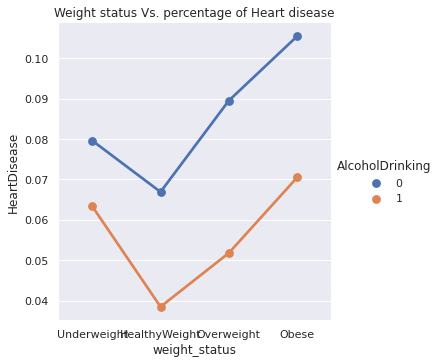

In [125]:
sns.catplot(x='weight_status',y='HeartDisease',data=data_copy,kind='point',hue="AlcoholDrinking",ci=None).set(title='Weight status Vs. percentage of Heart disease');

## Question 2

What is the relationship between age category and heart disease for both genders/sexes? 

**Answer:** 

- The graph shows that men and women have the almost same risk of getting heart disease from the ages of 18-44. However, this trend seems to change after that point with men having a higher risk of heart disease, and this difference grows consistently over the years. 

- One study we explored looked at data from Eastern Europe and suggested that the increased risk of heart disease in men is due to an increase in stress levels. Our next plot (Question 3) explores this in the context of our dataset.

Study source: https://pubmed.ncbi.nlm.nih.gov/12721140/

In [126]:
# g=sns.catplot(x='AgeCategory',y='HeartDisease' ,data=data_copy.sort_values('AgeCategory'),kind='point',hue='Sex',ci=None).set(title='AgeCategory vs. percentage of Heart disease by sex');
# g.set_xticklabels(rotation=45);


## Question 3


What is the relationship between Mental Health and Heart Disease, and how is it different by gender/sex? 

**Answer:**

- The graphs below confirm the positive correlation between mental health and heart disease. Across all age categories, people with heart disease report higher incidences of their mental health not being good. 

- However, what is surprising here is that for people with heart disease, and without heart disease; women report higher rates of their mental health not being good. For people with heart disease, this gap between men and women reaches its maximum after the age of 45.

- Thus while there is a correlation between mental health and heart disease, our dataset does not seem to confirm that the difference in heart disease rates between men and women is due to mental health. Thus, further exploration is needed to determine what is responsible for the higher rates of heart disease in men than women.

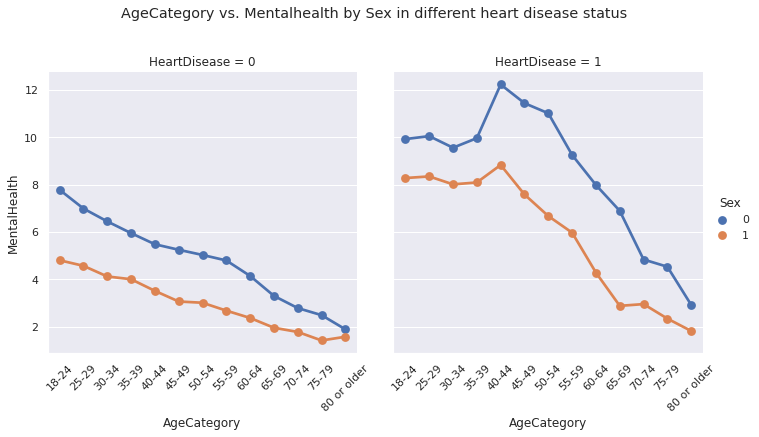

In [127]:
g=sns.catplot(x='AgeCategory',y='MentalHealth',data=data_copy.sort_values('AgeCategory'),kind='point',hue="Sex",col='HeartDisease',ci=None)
g.set_xticklabels(rotation=45);
g.fig.suptitle('AgeCategory vs. Mentalhealth by Sex in different heart disease status',y=1.1) ;



## Question 4



How is the difficulty in walking or climbing stairs related to incidence of heart disease across both genders/sexes? 

**Answer:** 

- The graph below clearly shows that people who faced difficulty walking/climbing had a much higher probability of having heart disease than people who did not face such issues. Understanding which of these variables causes the other is difficult as, on one hand, heart disease does make walking/climbing more difficult. However, on the other hand, walking is one of the ways to strengthen the heart muscles. 

- Regarding gender, it is interesting to note that on average, women across both categories (having difficulty walking and not having difficulty walking) had a lower probability of heart disease than their male counterparts within the same category. This leads us to understand that external factors are involved beyond physical health which is making males more vulnerable than females to heart disease. 

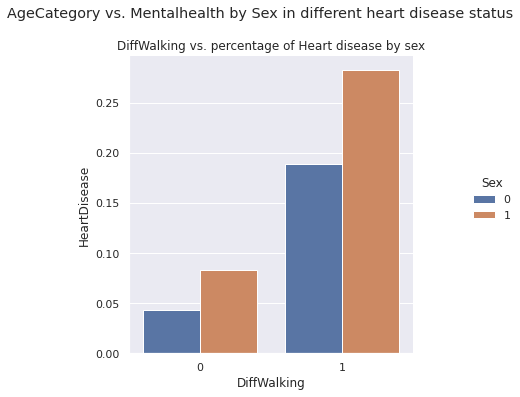

In [128]:
g=sns.catplot(x='DiffWalking',y='HeartDisease',data=data_copy,kind='bar',hue='Sex',ci=None).set(title='DiffWalking vs. percentage of Heart disease by sex')
g.fig.suptitle('AgeCategory vs. Mentalhealth by Sex in different heart disease status',y=1.1);

## Question 5 

What is the relationship between sleep time and heart disease for each weight class, across gender/sex?

**Answer:**

- The graphs below show that between the ages of 25 and 75; people with heart disease are on average sleeping fewer hours than people without heart disease. Thus the amount of sleep one gets seems to be correlated with the incidence of heart disease. We see that the trend is also similar for both men and women. 

- What is interesting to note here is that the difference in sleep hours between people who have heart disease, and those who do not is greatest for people between the ages of 25-50, and beyond that, as people get older, the difference in sleep hours between those with heart disease and those that don't shrink. 

- While in younger ages women sleep more than men, the difference in average sleep hours between them becomes narrower after the age of 40, and as they age, eventually men sleep more hours than women do.

- While the impact of sleep time affects men and women in very similar ways as shown by our graphs, it might be possible that men are more likely to suffer from heart disease as more men on average sleep less than women do.(Which we found during exploration) This will be something we will explore further in our final presentation.

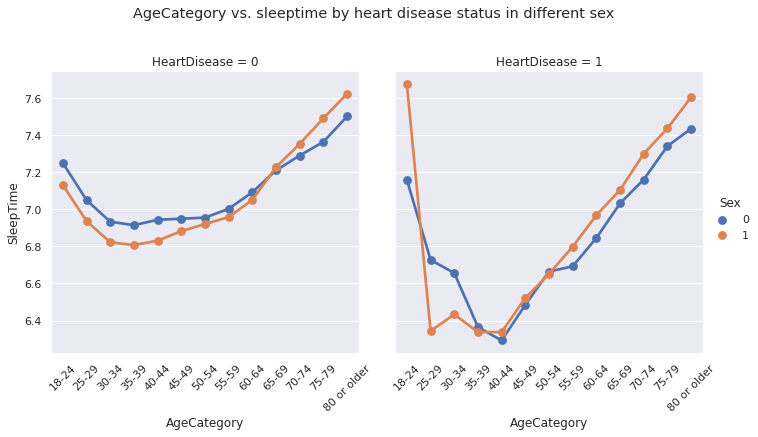

In [129]:
g=sns.catplot(x='AgeCategory',y='SleepTime',data=data_copy.sort_values('AgeCategory'),kind='point',hue="Sex",ci=None,col='HeartDisease')
g.set_xticklabels(rotation=45);
g.fig.suptitle('AgeCategory vs. sleeptime by heart disease status in different sex', y=1.1);

# 7. Reference
Facts about heart disease : https://www.cdc.gov/heartdisease/facts.htm

Articles indicate men are more mentally stressed than women in Europe 
https://pubmed.ncbi.nlm.nih.gov/12721140/

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
https://www.cdc.gov/brfss/annual_data/2020/files/LLCP2020ASC.zip
https://www.cdc.gov/os/quality/support/info-qual.htm
https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html
https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range
 https://pubmed.ncbi.nlm.nih.gov/12721140/
https://www.cdc.gov/heartdisease/facts.htm
https://pubmed.ncbi.nlm.nih.gov/12721140/

